# <font color=red> **_Gradient descent_** </font>
_________________________

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

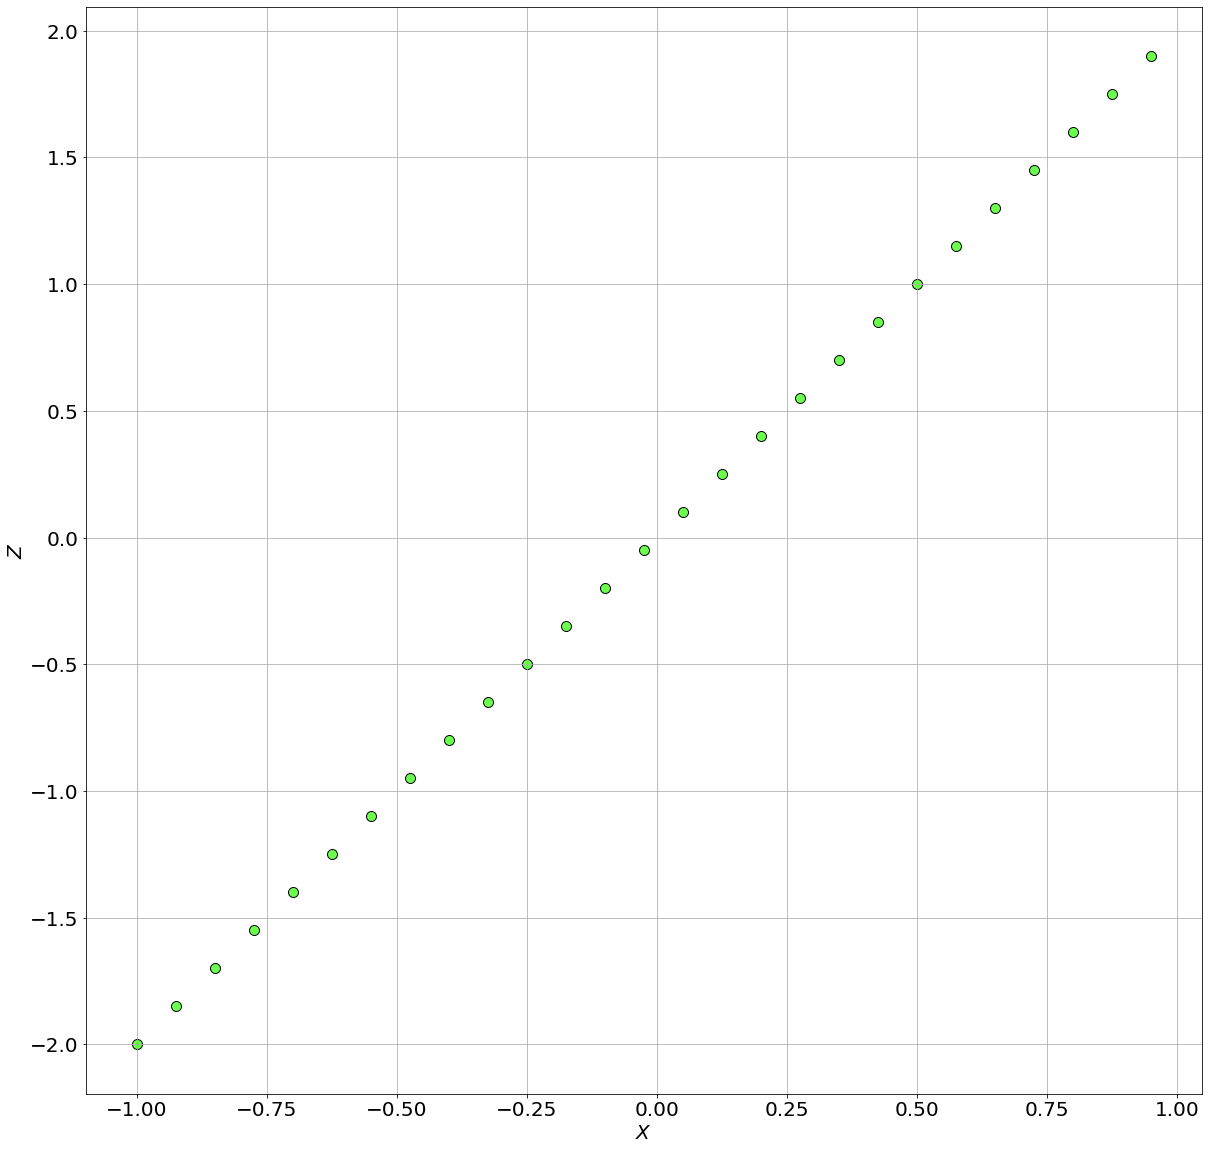

In [2]:
x = np.arange(-1,1,0.075)
z = 2 * x
plt.figure(figsize=(20,20))
plt.rcParams["font.size"]=20
plt.grid()
plt.xlabel("$X$")
plt.ylabel("$Z$")
plt.scatter(x,z, s=100, c="#6BFF4E", edgecolor="black");

## **_Generating a value for weight `w` that would generate a line that best fits the `z=wX` plot_**

<font size=4> **To do that we define a loss function, one common loss function `J` is shown below** </font>
    
<font size=6> $J(w)=\frac{1}{2m} \sum\limits_{i=0}^m(z_{i} - wx_{i})^{2}$ </font>    
Take the `z` value and the corresponding `x` value    
Subtract the product of `w`,`x` from `z` value     
Get the square of the subtracted value      
Sum the squared difference across all values of `z` and `x`      


In [3]:
W = np.arange(0,100,1)
X = np.arange(-1,1,0.02)
Z = X*2
m = len(X)

In [4]:
ssquares = dict()
for w in W:
    ssq = list()
    for i in range(len(X)):
        val = (np.power((Z[i] - w*X[i]), 2))
        ssq.append(val)
    ssquares[w] = np.array(ssq) / (2 * m)           

In [5]:
for i in range(100):
    print("Mean = ", np.mean(ssquares[i]), "Min = ", min(ssquares[i]), "Max = ", max(ssquares[i]))

Mean =  0.006668000000000012 Min =  1.5777218104420236e-32 Max =  0.02
Mean =  0.001667000000000003 Min =  3.944304526105059e-33 Max =  0.005
Mean =  0.0 Min =  0.0 Max =  0.0
Mean =  0.001667000000000003 Min =  3.944304526105059e-33 Max =  0.005
Mean =  0.006668000000000012 Min =  1.5777218104420236e-32 Max =  0.02
Mean =  0.015003000000000027 Min =  3.549874073494553e-32 Max =  0.045
Mean =  0.026672000000000046 Min =  6.310887241768095e-32 Max =  0.08
Mean =  0.041675000000000066 Min =  9.860761315262648e-32 Max =  0.125
Mean =  0.06001200000000011 Min =  1.4199496293978212e-31 Max =  0.18
Mean =  0.08168300000000014 Min =  1.9327092177914789e-31 Max =  0.245
Mean =  0.10668800000000019 Min =  2.524354896707238e-31 Max =  0.32
Mean =  0.13502700000000023 Min =  3.194886666145098e-31 Max =  0.405
Mean =  0.1667000000000003 Min =  3.944304526105059e-31 Max =  0.5
Mean =  0.20170700000000039 Min =  4.772608476587121e-31 Max =  0.605
Mean =  0.24004800000000043 Min =  5.679798517591285e

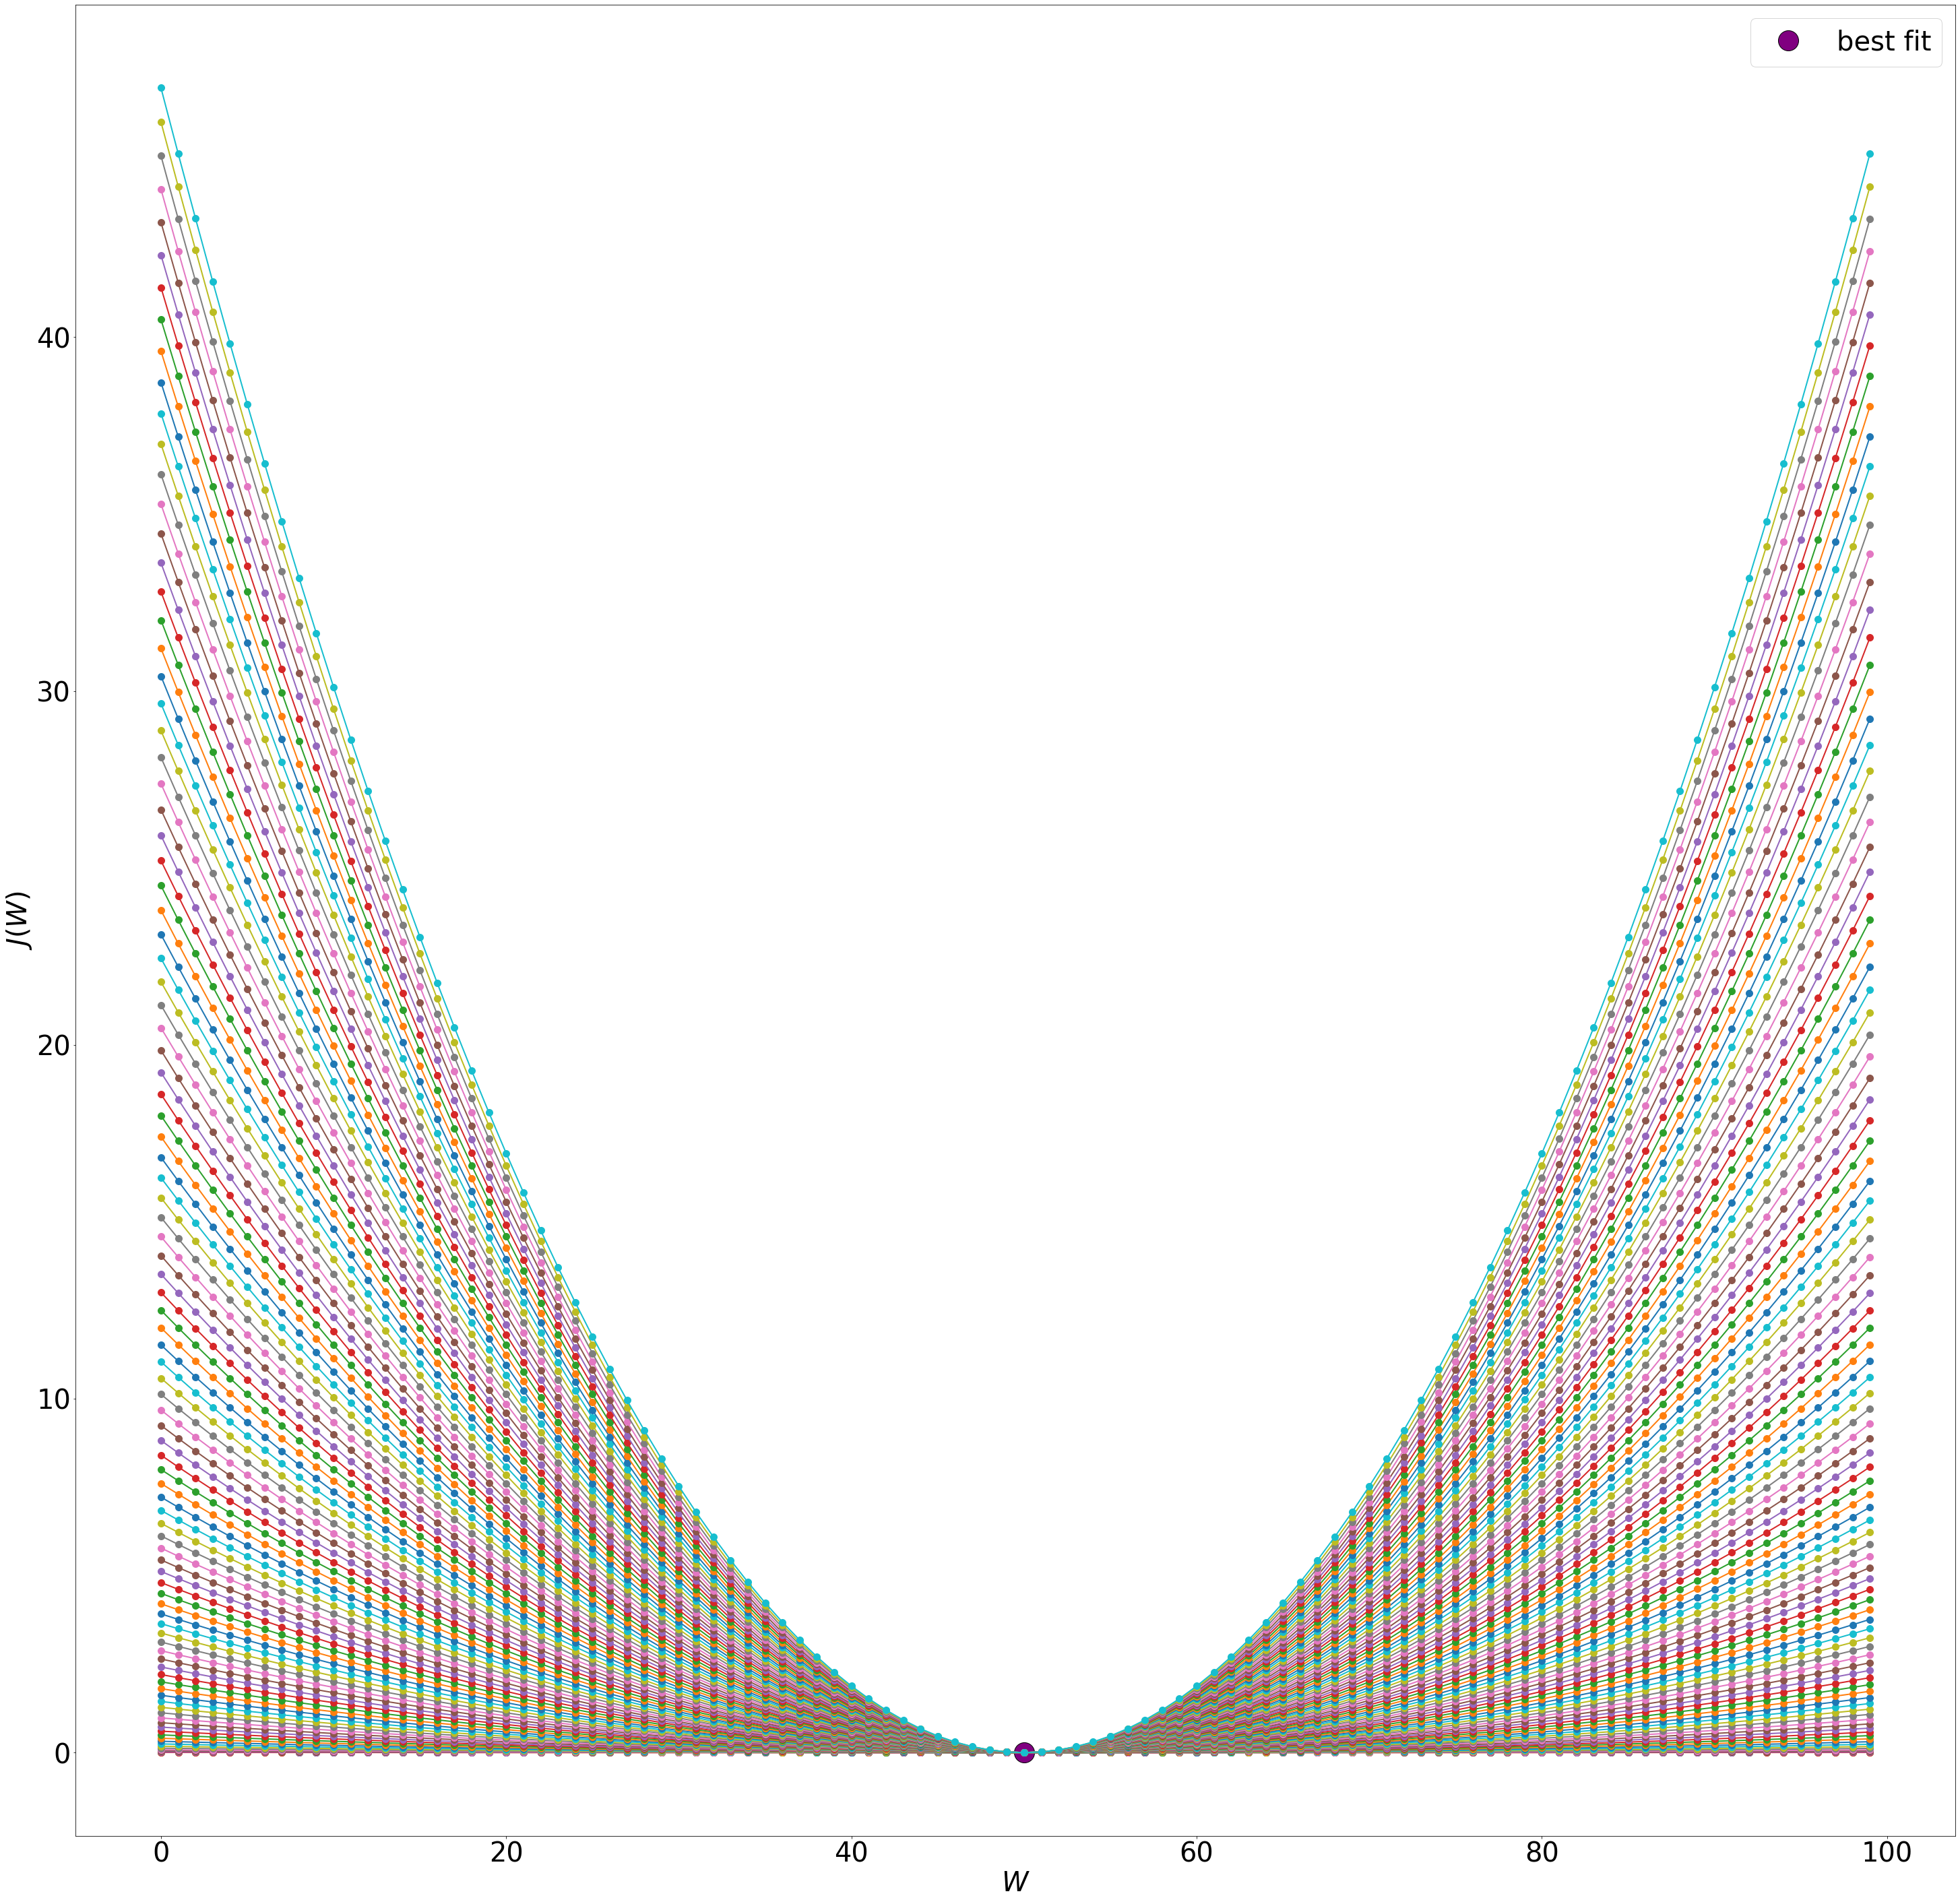

In [6]:
plt.figure(figsize=(50,50))
plt.rcParams["font.size"] = 40
plt.xlabel("$W$")
plt.ylabel("$J(W)$")
plt.plot(50,0, marker="o", markersize=30, markeredgecolor="black", color="purple", linestyle="none", label="best fit")
plt.legend(loc="upper right")
for i in range(100):
    plt.plot(W, ssquares[i], marker="o", markersize = 10, linestyle="solid", linewidth=2)

In [7]:
import gc
gc.collect()

14533

## In real world applications the target variable `Z` would be dependent on more than one variable!
**_So how to determine the best value for `W`?    
The best value for `W` or `Ws` in case there are multiple ways to optimize, is to use a <font color = "red"> Gradient descent algorithm! </font> Gradient descent is an iterative optimization algorithm to find the minimum of a function!_**   
### _This is done by taking steps proportional to the negative of the gradient of the function at the current point._   
**We start out at a random initial value for `W`; say $W_0$ and start taking steps towards the value of `W` where $J(W) = 0$**   
To determine which direction to move; calculate the slope of the loss function at the current value of `W` ( $W_0$ a random point). The slope is given by the tangent of the plot at $W = W_0$.    
The magnitude of the step (step size) is controlled by a parameter called the **_learning rate_**!    
The larger the learning rate, the bigger the step we take!   
Then we move to the next point $W_1$, $W_1$ is computed as follows;   
<font size=6> $W_1 = W_0 - \eta \frac{\partial{J}}{\partial{W}}$ </font>   
This is the first iteration of the algorithn. At $W_1$ this process is repeated from $W_1$ to $W_2$, using the same learning rate to control the magnitude of the step towards the minimum! This repeated until we hit the minimumpoint!    
One needs to be very careful when choosing the learning rate, since large learning rates produce bigger steps that can easily miss/skip past the minimum! While smaller learning rates produce shorter steps, making the iterative process very timeconsuming!     
**_If we initialize the first random point in the right of the minimum, then a positive gradient will result from $W$ moving to the left of the minimum._**

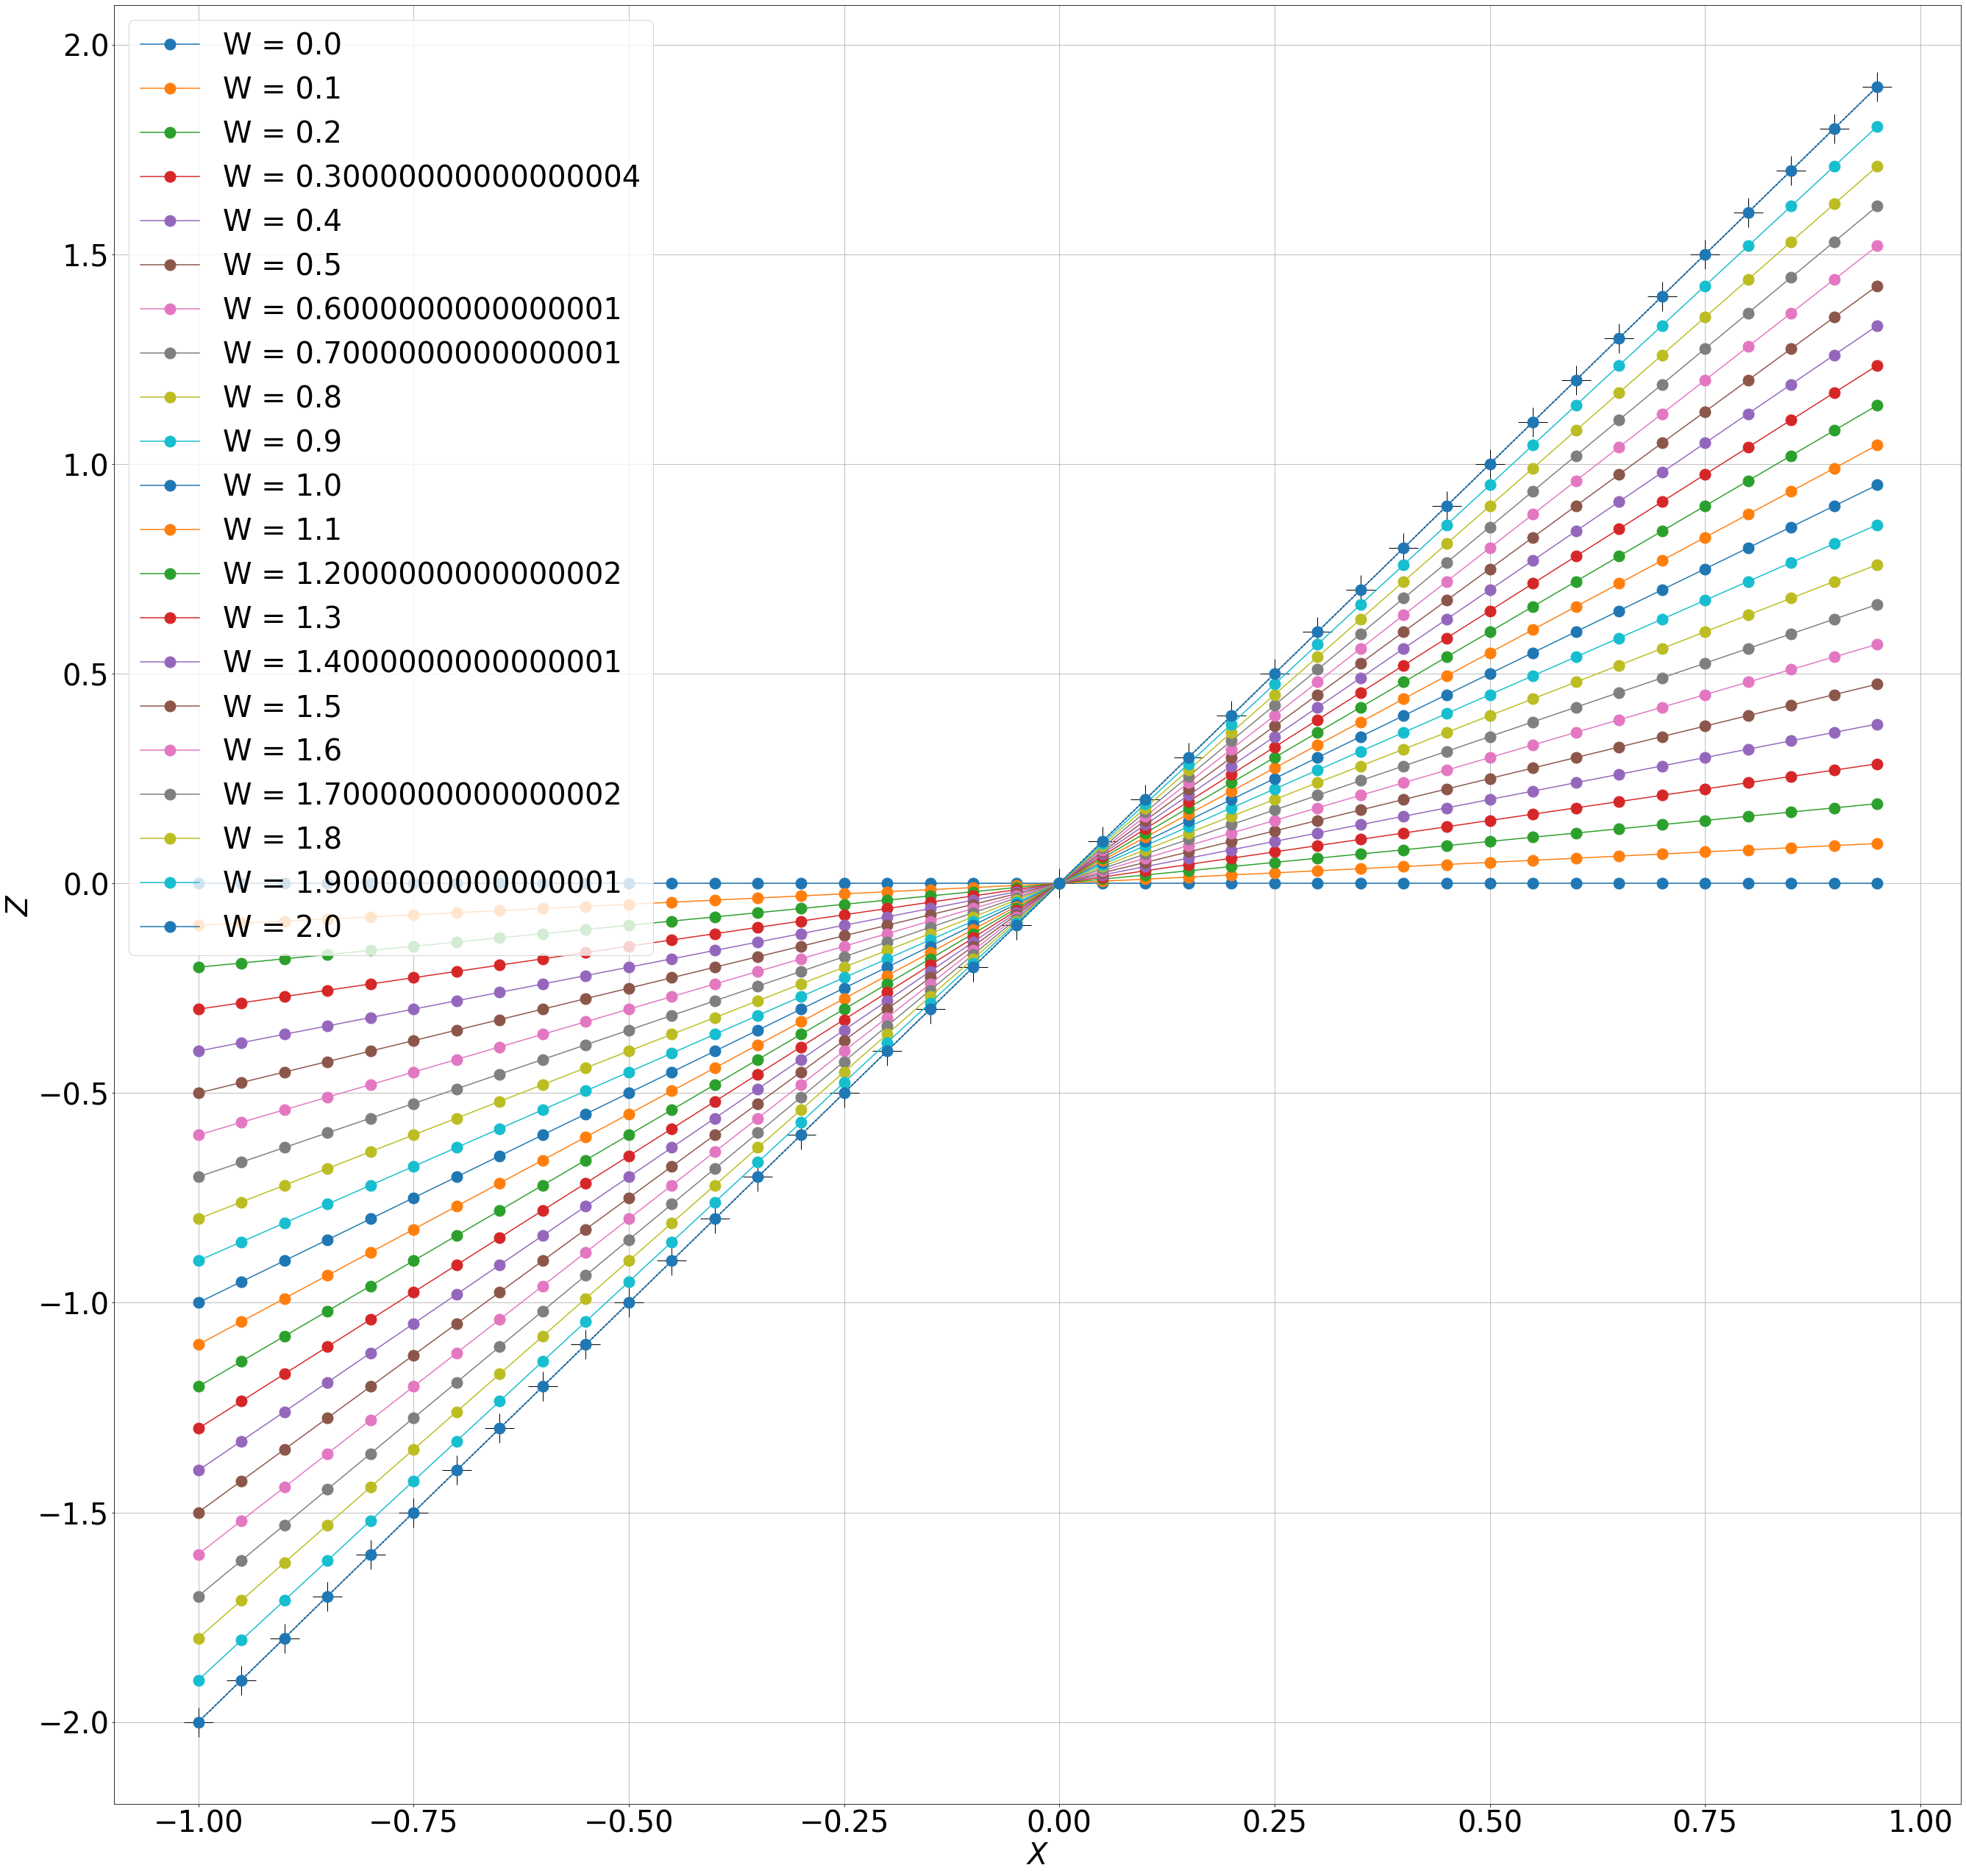

In [8]:
x = np.arange(-1,1,0.05)
z = 2*x
plt.figure(figsize=(45,45))
plt.rcParams["font.size"] = 40
plt.grid()
plt.plot(x,z, marker="+", color="black", markersize=40, linestyle="dotted", linewidth=2)
for w in np.arange(0.0,2.1,0.1):
    plt.plot(x, (w*x), markersize=15, marker="o", linewidth=1.5, label= str("W = "+ str(w)))
plt.xlabel("$X$")
plt.ylabel("$Z$")
plt.legend(loc="upper left")

# **_Back propagation_**
____________________________________

## **How do neural networks train & optimize their weights and biases for a given problem and dataset?**
________________________________________________________________________
Training is done in a supervised learning setting, where each data point has a corresponding label or ground truth! Training is needed when the predicted value by the neural network does not match the ground truth for a given input!    
**The training process starts with calculating the deviation (error) between the predicted value and the ground truth. error is denoted by $E$.    
This error never presents the loss function $W$!.   
Thus, the next step is to back propagate this error into the neural network and update each weight and biases per following equations!**   
<font size = 8> $w_i$ &rarr; $w_i - \eta. \frac{\partial{E}}{\partial{w_i}}$ </font>   
<font size = 8> $b_i$ &rarr; $b_i - \eta. \frac{\partial{E}}{\partial{b_i}}$ </font>
**For a simple linear neural network that has 2 neurons; takes a single input,   
The error i.e. the difference between predicted value $a_2$ and the ground truth $T$ is calculated by:**   
<font size = 8> $E = \frac{1}{2}(T - a_2)^2$ </font>  
**_But in real life conditions, one does not train a model with a single data point! Thus the error $E$ is calculated as follows:_**    
<font size = 8> $E = \frac{1}{2m}\sum\limits_{i=1}^{m}(T_i - a_{2,i})^2$ </font>   
**Then we use the error to update $w_2, b_2, w_1$ and $b_2$**

# **_Updating $w_2$_**    
_________________
# $w_2$ &rarr; $w_2 - \eta. \frac{\partial{E}}{\partial{w_2}}$    
Since the error is not axplicitly a function of $w_2$ we need to use the chain rule to establish the derivative of error (E) with respect to $w_2$.     
We know that:     
# $E = \frac{1}{2}.(T - a_2)^{2}$    
# $a_2 = f(z_2) = \frac{1}{1 +  e^{-z_2}}$    
# $z_2 = a_1 . w_2 + b_2$   
From these equations we can take the derivative of E with respect to a2 and the derivative of a2 with respect to z2 and the derivative of z2 with respect to w2. Then the derivative of the error with respect to w2 would simply be the product of the individual derivatives.     
# $\frac{\partial{E}}{\partial{w_2}} = \frac{\partial{E}}{\partial{a_2}}.\frac{\partial{E}}{\partial{z_2}}.\frac{\partial{z_2}}{\partial{w_2}}$     
# $\frac{\partial{E}}{\partial{w_2}} = (-(T - a_2)).(a_2(1 - a_2)).(a_1)$  


# _**Updating $w_1$**_   
________________________    
# $w_1$ &rarr; $w_1 - \eta.\frac{\partial{E}}{\partial{w_1}}$   
_**We know that Error `E` is a function of `a2`; `a2` is a function of `z2`; and `z2` is a function of `a1`; `a1` ia a function of `z1`**_  
# $E = \frac{1}{2}.(T - a_2)^{2}$    
# $a_2 = f(z_2) = \frac{1}{1 +  e^{-z_2}}$    
# $z_2 = a_1 . w_2 + b_2$   
# $a_1 = f(z_1) = \frac{1}{1 + e^{z_1}}$   
# $z_1 = x_1 . w_1 + b_1$    
**Thus the derivative of E with respect to w1 is the product of all the derivatives.**   
# $\frac{\partial{E}}{\partial{w_1}} = \frac{\partial{E}}{\partial{a_2}}.\frac{\partial{a_2}}{\partial{z_2}}.\frac{\partial{z_2}}{\partial{a_1}}.\frac{\partial{a_1}}{\partial{z_1}}.\frac{\partial{z_1}}{\partial{w_1}}$   
# $\frac{\partial{E}}{\partial{w_1}} = -(T - a_2).(a_2(1 - a_2)).w_2.a_1(1 - a_1).x_1$    

In [3]:
# Exapmle
x1 = 0.1
w1 = 0.15
b1 = 0.40
w2 = 0.45
b2 = 0.65

In [5]:
z1 = x1 * w1 + b1
z1

0.41500000000000004

In [8]:
a1 = 1 / (1 + np.exp(-z1))
a1

0.6022861768886306

In [10]:
z2 = w2 * a1 + b2
z2

0.9210287795998838

In [11]:
a2 = 1 / (1 + np.exp(-z2))
a2

0.7152516802527555

**This is the predicted value by the network for an input `x1` = 0.1.   
Let us assume the ground truth is `T` = 0.25  
Let us first compute the error between the ground truth & predicted value!**

In [13]:
# E = 1/2 . (T - a2)^2
T = 0.25
E = 0.5 * (T - a2)**2
E

0.10822956298900614

**Then we will start updating the values of weights & biases either for a predefined number of iterations (epochs) eg. 1000 or until the error `E` is within a predefined threshold eg. E < 0.001   
Using a learning rate $\eta$ = 0.4 let us see how the weights and biases change after the first iteration**

In [19]:
# update w2
w2new = w2 - (0.4 * -(T - a2) * (a2 * (1 - a2)) * a1)
w2new

0.42717184071957803

In [21]:
# update b2
b2new = b2 - (0.4 * -(T - a2) * (a2 * (1 - a2)) * 1)
b2new

0.6120974876123662

In [23]:
# update w1
w1new = w1 - (0.4 * -(T - a2) * (a2 * (1 - a2)) * w2 * a1 * (1 - a1) * x1)
w1new

0.14959144164740945

In [25]:
# update b1
b1new = b1 - (0.4 * -(T - a2) * (a2 * (1 - a2)) * w2 * a1 * (1 - a1) * 1)
b1new

0.39591441647409464

_**This completes the first iteration / epoch of the updating process**_

# <font color="red">_**Vanishing gradient**_</font>
 ___________________________    
**A major problem with the sigmoid activation function is the vanishing gradient.   
According to previous example that uses a simple network with just two neurons:
Derivatives of error `E` with respect to weights are as follows:**    
# $\frac{\partial{E}}{\partial{w_1}} = 0.001021$   
# $\frac{\partial{E}}{\partial{w_2}} = 0.05706$
**Notice how small the gradients are!   
More importantly how small the gradient of `E` withrespect to w1!**   

<font color="red"> **_Since we are using the sigmoid function a the activation function; all the intermediate values in the network are between 0 and 1. When we do back propagation we keep multiplying factors that are less than 1 by each other and consequently the gradient tends to get smaller and smaller as we keep moving backwards in the network. This implies that the neurons in the earlier layers learn more slowly as compared to the neurons in the later layers in the network. Thus the earlier layers in the network are the slowest to train. This results in a training process that takes too long and a prediction whose accuracy is compromised._** </font>   
## ***Thus sigmoid or similar functions are not used as activation functions since they are prone to vanishing gradient problems.***

# <font color="red"> **_Other activation functions_** </font>
-----------------------------
**These are some other activation functions that are more efficient to use and more applicabe in deep learning.   
There are seven types of activation functions:      
    1) Binary step function     
    2) Linear function    
<font color="red">    3) Sigmoid/Logistic function    
    4) Hyperbolic tangent function      
    5) Rectified linear unit (ReLU) function      </font>    
    6) Leaky ReLU function     
<font color="red">    7) Softmax function**    </font>   
_**Important & commonly used activation functions are highlighted in red**_

## <font color="red"> **_Sigmoid function_** </font>   
---------------------------------------
# $a = \frac{1}{1 + e^{-z}}$
**When z = 0; a = 0.5 and when z is a very large positive number a is close to 1, and when z is a very large negative number a is close to 0.   
Sigmoid function used to be widely used as activation function in the hidden layers of the neural networks. However the function is pretty falt beyond +3 & -3 range. This means when this function falls in that region gradients become very small: _Vanishing gradient problem_. As the gradient approaches 0, the network does not really learn.   
Another problem with sigmoid activation functions is that the values only range from 0 to 1.   
This means the sigmoid function is not symmetric around the origin and values are all positive which is not desirable all the time.**

## <font color="red"> **_Hyperbolic tangent function_** </font>   
---------------------------------------
# $a = \frac{e^{z} - e^{-z}}{e^{z} + e^{-z}}$   
**This is actually just a scaled version of the sigmoid function. But unlike the sigmoid function this is symmetric over the origin. It ranges from -1 to +1. Eventhough this function overcomes the issue of asymmetry through scaling it still has the vanishing gradient problem.**

## <font color="red"> **_ReLU function_** </font>   
---------------------------------------
# $a = max(0,z)$   
**Rectified linear unit (ReLU) function is the most widely used activation function when designing networks today.   
In addition to being non-linear the main advantage of ReLU functions is that it does not activate all the neurons at the same time.   
If the input is negative it will be converted to 0 and the neuron will not be activated.    
This means that only a few neurons are activated at once; making the network sparse and efficient.**   

## <font color="red"> **_Softmax function_** </font>   
---------------------------------------
# <font size=40> $a_i = \frac{e^{z_i}}{\sum_{k=1}^{m}{e^{z_k}}}$ </font>   
**This is also a type of sigmoid function. But this is helpful when handling classification problems. 
This is ideally used in the output layer of the classifier where we are actually trying to get the probabilities to define the class of each input.    
So a network with 3 neurons in output layer gives 1.6, 0.55 & 0.98  i.e z1 = 1.6, z2 = 0.55 & z3 = 0.98   
This is converted to a1 = 0.51, a2 = 0.18 & a3 = 0.31 by the softmax function.    
This way it is easier for us to classify a datapoint and determine to which category each datapoint belongs.**   
<font color="green"> **Sigmoid & hyperbolic tangent functions are generally avoided since they are susceptibe to vanishing gradient problems.    
And the ReLU function is the mostly used activation function these days and ReLU is only used in the hidden layers.     
One can switch different activation functions the see which gives optimal results**</font>

# <font color="red"> _**Deep learning libraries**_ </font>
____________________________________________     
**Most popular deep learning libraries are:     
&emsp; &emsp; &emsp; &emsp; 1) Tensorflow    
&emsp; &emsp; &emsp; &emsp; 2) Keras    
&emsp; &emsp; &emsp; &emsp; 3) PyTorch    
&emsp; &emsp; &emsp; &emsp; 4) Theano - No longer supported    
Both Tensorflow and PyTorch are low level deep learning libraries. Thus are not beginner friendly.   
Keras is a high-level API that help build deep learning models.   
Keras normally runs on top of a lower level deep learning libraries like Tensorflow/PyTorch.    
When you import Keras it will be explicitly displayed which backend was used to install the Keras library.**  
**_TL;DR - Keras is just a wrapper!_**

# <font color = "red"> **_Keras_** </font>
-------------------------------------------

In [2]:
import keras
from keras.models import Sequential

# **_Regression models with Keras_**
__________________________________________

In [13]:
# a regression example
# a dataset of compressive strength of differnet types of concrete based on volumes of different materials 
# used to make the concrete mixture
data = pd.read_excel("Concrete_Data.xls")

In [14]:
data.head()

Cement (component 1)(kg in a m^3 mixture)  \
0                                      540.0   
1                                      540.0   
2                                      332.5   
3                                      332.5   
4                                      198.6   

   Blast Furnace Slag (component 2)(kg in a m^3 mixture)  \
0                                                0.0       
1                                                0.0       
2                                              142.5       
3                                              142.5       
4                                              132.4       

   Fly Ash (component 3)(kg in a m^3 mixture)  \
0                                         0.0   
1                                         0.0   
2                                         0.0   
3                                         0.0   
4                                         0.0   

   Water  (component 4)(kg in a m^3 mixture)  \
0                                      162.0   
1                                      162.0   
2                                      228.0   
3                                      228.0   
4                                      192.0   

   Superplasticizer (component 5)(kg in a m^3 mixture)  \
0                                                2.5     
1                                                2.5     
2                                                0.0     
3                                                0.0     
4                                                0.0     

   Coarse Aggregate  (component 6)(kg in a m^3 mixture)  \
0                                             1040.0      
1                                             1055.0      
2                                              932.0      
3                                              932.0      
4                                              978.4      

   Fine Aggregate (component 7)(kg in a m^3 mixture)  Age (day)  \
0                                              676.0         28   
1                                              676.0         28   
2                                              594.0        270   
3                                              594.0        365   
4                                              825.5        360   

   Concrete compressive strength(MPa, megapascals)   
0                                         79.986111  
1                                         61.887366  
2                                         40.269535  
3                                         41.052780  
4                                         44.296075

In [15]:
# building a deep learning model to predict the compressive strength of concrete mixtures based on their 
# ingredients
# let's say the neural network takes all the eight features (except for compressive strength) as inputs
# feeds them to a hidden layer of five nodes
# which is connected to another hidden layer of five nodes
# which are connected to the output layer with one node that is supposed to output the compressive strength
# usually one needs 50 - 100 hidden layers for a acceptably good results
# when each node in one layer is connected to all the nodes in adjacent layers is called a dense network

In [16]:
data.shape

(1030, 9)

In [17]:
# data preprocessing
# split the dataset into two: one with predictors another with target
# predictors are the features used to predict the compression strength
# target is the compression strength
predictors = data.iloc[:,0:8]
target = data.iloc[:,8]

In [18]:
# since our network consists of a linear stack of layers sequential model is the best bet
# there are two models in Keras library
# one is sequential model
# other is a model class - used with functional API

model = Sequential() # create a sequential model
from keras.layers import Dense  # import the dense layer type
ncols = predictors.shape[1]  # column number in the data dataframe

model.add(Dense(5, activation = "relu", input_shape = (ncols,)))  
# type of network, number of neurons in each layer & the type of activation function
# for the first hidden layer we need to specify the number of predictors in the dataset as input_shape

model.add(Dense(5, activation = "relu"))  # second hidden layer
model.add(Dense(1))  #output layer with one node

model.compile(optimizer="adam", loss="mean_squared_error")  
# adam algorithm does not require the learning rate to be specified manually
# and is more efficient than the gradient descent optimizer
# epochs can be specified for model training: number of iterations
model.fit(predictors, target)  # train the model

33/33 [==============================] - 1s 976us/step - loss: 13721.7783


# **_Classification models with Keras_**
______________________________________________

In [19]:
# build a model that informs someone whether purchasing a car would be a good choice based on the 
# price of the car
# cost to maintain it
# whether it can accomodate 2/more people

In [20]:
# decision 0 - not acceptable, 1 - acceptable, 2 - good, 3 - very good
np.random.seed(2022-3-14)
price_high = np.random.randint(low=0, high=2, size=1000)
price_low = np.zeros(1000, dtype=int)
price_low[np.where(price_high == 1)] = 0

In [21]:
maintenance_high = np.random.randint(low=0, high=2, size=1000)
maintenance_low = np.zeros(1000, dtype=int)
maintenance_low[np.where(maintenance_high == 1)] = 0

In [22]:
twoseater = np.random.randint(low=0, high=2, size=1000)
morePersons = np.zeros(1000, dtype=int)
morePersons[np.where(twoseater == 1)] = 0

In [23]:
decision = price_high + price_low + maintenance_high + maintenance_low + twoseater + morePersons

In [24]:
# lets create a dummy dataset
d = {"price_high":price_high, "price_low":price_low, "maintenance_high":maintenance_high, "maintenance_low":maintenance_low, "twoseater":twoseater, "morePersons":morePersons, "decison":decision} 
car = pd.DataFrame(data=d, dtype=int)

In [25]:
car.head()

price_high  price_low  maintenance_high  maintenance_low  twoseater  \
0           1          0                 1                0          1   
1           1          0                 1                0          1   
2           1          0                 1                0          1   
3           1          0                 0                0          1   
4           0          0                 0                0          0   

   morePersons  decison  
0            0        3  
1            0        3  
2            0        3  
3            0        2  
4            0        0

In [26]:
# let's use the same neural network as the one we used in the regression example
predictors = car.iloc[:,0:6]
target = car.iloc[:,6]

In [27]:
predictors.shape

(1000, 6)

In [28]:
# in Keras for classification problems; we need to transform the target column into an array with binary values
# this can be achieved easily by the to_categorical() function from Keras utilities package
# since the output has 4 categories the output layer will have 4 neurons

model = Sequential()
from tensorflow.keras.utils import to_categorical
ncols = predictors.shape[1]
target = to_categorical(target)  # converting the numbers to binary arrays

# adding layers
model.add(Dense(5, activation="relu", input_shape=(ncols,)))
model.add(Dense(5, activation="relu"))
model.add(Dense(4, activation="softmax"))  # output layer with 4 neurons for each category
# softmax: sum of the outputs from all the 4 neurons sum up to 1.0

# compiling the model
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

# fitting the model
model.fit(predictors, target, epochs=20)

Epoch 1/20
32/32 [==============================] - 1s 1ms/step - loss: 1.3990 - accuracy: 0.1930
Epoch 2/20
32/32 [==============================] - 0s 1ms/step - loss: 1.3554 - accuracy: 0.3450
Epoch 3/20
32/32 [==============================] - 0s 504us/step - loss: 1.3211 - accuracy: 0.4620
Epoch 4/20
32/32 [==============================] - 0s 1ms/step - loss: 1.2914 - accuracy: 0.5040
Epoch 5/20
32/32 [==============================] - 0s 504us/step - loss: 1.2630 - accuracy: 0.5040
Epoch 6/20
32/32 [==============================] - 0s 210us/step - loss: 1.2397 - accuracy: 0.5040
Epoch 7/20
32/32 [==============================] - 0s 504us/step - loss: 1.2184 - accuracy: 0.5040
Epoch 8/20
32/32 [==============================] - 0s 1ms/step - loss: 1.1991 - accuracy: 0.5040
Epoch 9/20
32/32 [==============================] - 0s 504us/step - loss: 1.1820 - accuracy: 0.5040
Epoch 10/20
32/32 [==============================] - 0s 714us/step - loss: 1.1660 - accuracy: 0.5040
Epoch 1

In [29]:
# creating a dummy test dataset
np.random.seed(2022-3-15)

price_highTest = np.random.randint(low=0, high=2, size=1000)
price_lowTest = np.zeros(1000, dtype=int)
price_lowTest[np.where(price_highTest == 1)] = 0

maintenance_highTest = np.random.randint(low=0, high=2, size=1000)
maintenance_lowTest = np.zeros(1000, dtype=int)
maintenance_lowTest[np.where(maintenance_highTest == 1)] = 0

twoseaterTest = np.random.randint(low=0, high=2, size=1000)
morePersonsTest = np.zeros(1000, dtype=int)
morePersonsTest[np.where(twoseaterTest == 1)] = 0

decisionTest = price_highTest + price_lowTest + maintenance_highTest + maintenance_lowTest + twoseaterTest + morePersonsTest

dTest = {"price_high":price_highTest, "price_low":price_lowTest, "maintenance_high":maintenance_highTest, "maintenance_low":maintenance_lowTest, "twoseater":twoseaterTest, "morePersons":morePersonsTest, "decison":decisionTest} 
carTest = pd.DataFrame(data=dTest, dtype=int)

predictorsTest = carTest.iloc[:,0:6]
targetTest = carTest.iloc[:,6]

In [30]:
predictorsTest.shape

(1000, 6)

In [31]:
predictions = model.predict(predictorsTest)
predictions

array([[0.07976536, 0.43588424, 0.4162543 , 0.06809598],
       [0.11143274, 0.790716  , 0.07558548, 0.0222658 ],
       [0.11143274, 0.790716  , 0.07558548, 0.0222658 ],
       ...,
       [0.17197189, 0.26560503, 0.358113  , 0.20431004],
       [0.11143274, 0.790716  , 0.07558548, 0.0222658 ],
       [0.11143274, 0.790716  , 0.07558548, 0.0222658 ]], dtype=float32)

**This `.predict()` method returns an array pf 1000 lists  
Each list with 4 numbers correspond to each of the 1000 rows in the test dataset    
Inside each list the probabilities for the row to belong to the 4 categories are given.    
For each data row the probabilities should sum up to 1.0   
The higher the probability; the more confident is the algorithm in determining that a data point belongs to a particular category.    
e.g The first data point (first row/record) belongs to category 2 since the second value in the list is the largest. The last data point belongs to category 3 as the third value in the list is the largest.!**

In [32]:
category = list()
for i in range(1000):
    for j in range(4):
        if predictions[i][j] == np.max(predictions[i]):
            category.append(j)
        else:
            pass        

In [33]:
len(category)

1000

In [34]:
np.mean(category)

1.487

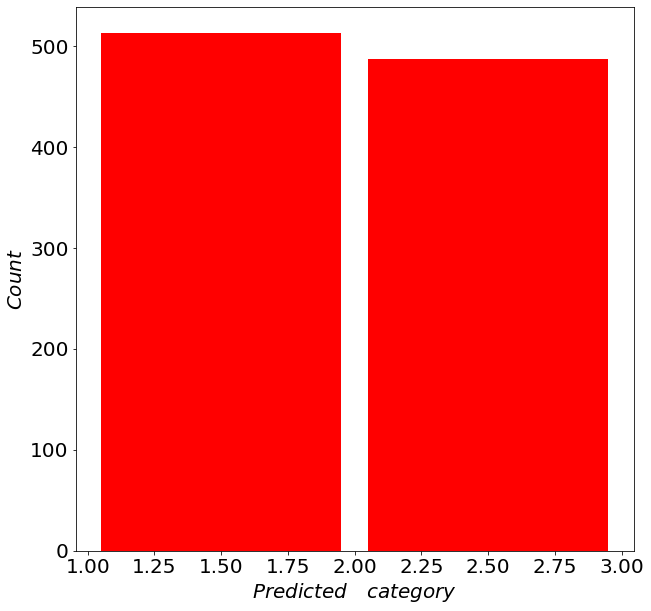

In [38]:
plt.figure(figsize=(10,10))
plt.rcParams["font.size"] = 20
plt.hist(category, color = "red",histtype="bar", bins = (1,2,3), rwidth=0.9)
plt.xlabel("$Predicted\hspace{1}category$")
plt.ylabel("$Count$")
plt.show()

# _**Shallow vs Deep neural networks**_
______________________________
**A neural network with just one hidden layer is considered a shallow neural network.   
In general a deep neural network has more hidden layers and has large number of neurons per layer.   
Shallow neural networks take inputs strictly as vectors.   
Deep neural networks are capable of taking raw data as input. eg. images, text and can automatically extract the necessary information to learn the data better.**   

### **Why deep learning took off?**   
&emsp;&emsp; 1) Advancements in the field    
&emsp;&emsp; 2) Availability of big data  
&emsp;&emsp; 3) Increased computational power leveraging GPUs     



# **_Convolutional neural networks (CNNs)_**
__________________________________________
## _**CNNs are a type of supoervised neural networks**_

**Convolutional neural networks are very similar to typical neural networks    
They are made of neurons that need to have their weights & biases optimized   
Each neuron combines the input it receives by computing the dot product for each input & its cognate weight before feeding the resulting input to an activation function.**    
<font color="red"> **CNNs make the explicit assumption that the inputs are images, which allows us to incorporate certain properties into their architecture. These properties make the forward propagation step much more efficient and reduces the number of parameters in the network. Therefore CNNs are best for solving problems related to image recognition, object detection & other computer vision applications** </font>     

**A typical architecture of a convolutional neural network is made of:      
&emsp;&emsp;&emsp; 1) Input image        
&emsp;&emsp;&emsp; 2) Convolutional layer           
&emsp;&emsp;&emsp; 3) Pooling layer    
&emsp;&emsp;&emsp; 4) Convolution layer     
&emsp;&emsp;&emsp; 5) Pooling layer      
&emsp;&emsp;&emsp; 6) Fully connected layer      
&emsp;&emsp;&emsp; 7) Output**     

## _**Input layer**_    
Conventional neural networks take an <font size=5> $n.1$ </font> vector as input. The input to a convolutional neural network is mostly an <font size=5> $n.m.1$ </font> for greyscale images and <font size=5> $n.m.3$ </font> for color images where the 3 represents the R,G & B components of each pixel in the image.    
## _**Convolutional layer**_   
Filters are defined in the convolutional layers. We compute the convolution between the defined filters and the each of the three images (the R,G & B layers of the images) 

In [43]:
red = np.array(([27,123,32,34,46],[6,23,65,89,99],[125,110,223,25,78],[189,189,219,200,7],[67,45,123,98,90]))
red

array([[ 27, 123,  32,  34,  46],
       [  6,  23,  65,  89,  99],
       [125, 110, 223,  25,  78],
       [189, 189, 219, 200,   7],
       [ 67,  45, 123,  98,  90]])

Let us assume these are the pixel values in the Red layer of an image.   
For a 2x2 filter with following values; let us create an empty matrix to save the results of a convolyion process.

In [45]:
filter = np.array(([0,1],[0,1]))
filter

array([[0, 1],
       [0, 1]])

In [47]:
matrix = np.zeros((4,4))
matrix

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

**We start by sliding the filter over the image and computing the dot product between the filter and the overlapping pixel values and storing the results in the empty matrix. We repeat this process by moving the filter one cell at a time in one linear direction.**

In [57]:
np.dot(filter, red[0:2,0:2])

array([[ 6, 23],
       [ 6, 23]])

**We repeat this until we cover the entire image. Here we have seen just one filter for just one color layer.   
Same should be applied to green & blue color layers and you can apply more than one filter.   
The more filters we use the more we will be able to preserve the spatial dimensions.**    
## _**But why use convolution?**_   
**Why not just flatten the image into a $n.m.1$ vector and use that as input?   
If we do that we will end up with a massive number of parameters that need to be optimized, which is computationally expensive. And reducing the number of parameters will prevent the model from overfitting the training data. A convolutional layer also consists of ReLUs that filter the outputs of convolution step; passing only the positive values and turning any negative values to zero.**

## _**Pooling layer**_
**Main objective of pooling layer is to reduce the spatial dimensions of the data propagating through the network.   
There are two types of pooling widely used in convolutional neural networks:    
&emsp;&emsp;&emsp; 1) Max pooling   
&emsp;&emsp;&emsp; 2) Average pooling    
In max pooling; which is the most common of the two for each selection of the image we scan (portion of the image that overlaps with the selection filter) we keep the highest value.   
In average pooling we compute the average of each area we scan.   
In addition to reducing the dimension of the data, pooling; max pooling in particular provides spatial variance which enables neural networks to recognize an object in an image even if the object does not exactly resemble the original object.**

## **_Fully connected layer_**  
**We flatten the output of the last convolutional layer in the fully connected layer.    
Fully connected layer connects evry node of the previous layer with every node in the next layer.  
This layer takes the output from the preceding convolutional/pooling/ReLU layer as input and outputs an n dimensional vector where n is the number of classes pertaining to the problem at hand.    
eg. If we are building a network to classify the images of digits n would be 10.**   

# <font color="red"> _**Convolutional neural networks in Keras**_ </font>
______________________________________

In [62]:
from keras.layers import MaxPooling2D
from keras.layers import Conv2D
from keras.layers import Flatten

In [63]:
model = Sequential()  # construct the model
input_shape = (128,128,3)  # define the shape of the input to be the size of the input images

# adding layers to the model
model.add(Conv2D(16, kernel_size = (2, 2), strides = (1,1), activation = "relu", input_shape = input_shape))
# specifying 16 filters with each filter being 2x2 that stride through the image by 1 in horizontal direction
# and 1 in vertical direction.
model.add(MaxPooling2D(pool_size = (2,2), strides = (2,2)))
# pooling layer using max pooling type, filter size 2x2, filter slides 2 points in both horizontal & vertical axes
model.add(Conv2D(32, kernel_size = (2,2), activation = "relu"))  # more filters than the first convolutional layer
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Flatten())  # flattening the output to pass to the fully connected layer
model.add(Dense(100, activation = "relu"))   # fully connected dense layer
model.add(Dense(num_classes, activation = "softmax"))  # softmax activation to convert the output into probabilities

NameError: name 'num_classes' is not defined

# <font color="red"> **_Recurrent neural networks (RNNs)_** </font>       
__________________________________________

**Another supervised deep learning model.    
Unlike other deep learning models that see data points as independent instances; RNNs see data points as a sequence of instances. If we want to build a model that analyzes scenes in a movie; they are not independent of one another since scenes in a movie are interrelated. Thus traditional deep learning models are unsuitable for these purposes. RNNs are deep learning models with loops that do not just take a new input at a time but also takes the output of the previous data point that was fed into the network.          
RNNs are thus very good at modelling patterns in sequences of data such as text, genomes, handwriting and stock markets.     
These algorithms take time and sequences into account which means that they have a temporal dimension.**    

## _**Long Short-Term Memory Model (LSTM)**_

**A type of RNN.     
Succesfully used in image, handwriting generation and build algorithms that can describe images and scenes from videos.**

# <font color="red"> **_Autoencoders_** </font>
______________________________

**Autoencoder is an unsupervised deep learning model.    
Autoencoding is a data compression algorithm where the compression and decompression functions are learned automatically from data instead of being engineered by a human.   
Autoencoders are built using neural networks.   
They are data specific that implies that they can only function efficiently only on data similar to the data on which they were trained.     
An autoencoder trained on pictures of cars will do a rather poor job on pictures of buildings.   
Autoencoders are best for data de-noising, dimension reduction for data visualization.    
Autoencoding algorithm takes an image as input and uses an encoder to find the compressed representation of the input image and then the image is restored using a decoder.        
It uses back propagarion by setting the target variable to be same as the input.   
Because of non linear activation functions in neural networks; autoencoders can learn data patterns that are more interesting than PCA or other similar techniques.**            

## **_Restricted Boltzmann Machines (RBMs)_**

**A popular type of autoencoder.          
Used in imbalanced data sets, as RBMs learn the input in order to be able to regenerate it; they can learn the distribution of the minority class in the dataset and then generate more data poinbts for that data class to balance that class. Thus transforming the imbalanced dataset into a balanced data set.   
Similarly RBMs are also used in estimating the missing values in different variables.    
RBMs are also used in automatic feature extraction from unstructured data.**